# In-Depth Exploratory Data Analysis (EDA)
## Netflix Content Analysis

1.  **Data Cleaning & Transformation:** Handling missing values and converting data types (especially dates).
2.  **Time-Series Analysis:** Analyzing how content has been added to Netflix over the years.
3.  **Text Data Manipulation:** Parsing and analyzing columns with multiple values, like `listed_in` (genres) and `cast`.
4.  **Geographical & Rating Analysis:** Understanding where content comes from and its maturity level.
5.  **Feature Engineering:** Creating new, insightful features like 'content age'.
6.  **Advanced Visualization:** Creating insightful plots to understand distributions and relationships in the data.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set_style('whitegrid')

## Data Loading and Initial Inspection

In [2]:
netflix_df = pd.read_csv('../Data/netflix_titles.csv')

In [3]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
netflix_df.shape

(7787, 12)

In [5]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
netflix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


## Data cleaning and transformation

In [7]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [8]:
# Handling Missing Values in 'director' and 'cast' columns
netflix_df['director'] = netflix_df['director'].fillna("Unknown")
netflix_df['cast'] = netflix_df['cast'].fillna("Unknown")

In [9]:
# Handle missing values in 'country' column by filling with the mode
mode_country = netflix_df['country'].mode()[0]
netflix_df['country'] = netflix_df['country'].fillna(mode_country)

In [10]:
# Drop the few rows with missing 'date_added' and 'rating'
netflix_df.dropna(subset=['date_added', 'rating'], inplace=True)

In [11]:
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [12]:
# Convert 'date_added' to datetime objects
netflix_df['date_added']
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format = 'mixed', dayfirst= False)

In [13]:
netflix_df['date_added']

0      2020-08-14
1      2016-12-23
2      2018-12-20
3      2017-11-16
4      2020-01-01
          ...    
7782   2020-10-19
7783   2019-03-02
7784   2020-09-25
7785   2020-10-31
7786   2020-03-01
Name: date_added, Length: 7770, dtype: datetime64[ns]

In [14]:
# Create new features for year and month added
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month

In [15]:
# Verify the cleaning and transformation
print("Missing values after cleaning:")
print(netflix_df.isnull().sum())
print("\nData types after transformation:")
print(netflix_df.dtypes)

Missing values after cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

Data types after transformation:
show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added               int32
month_added              int32
dtype: object


## Exploratory Data Analysis & Visualization

### Q. What is the distribution of content type?

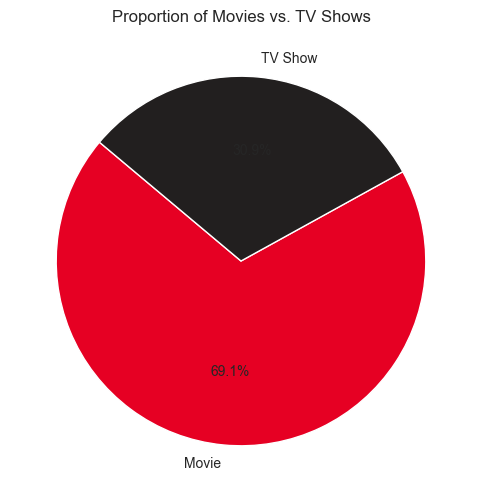

In [16]:
plt.figure(figsize=(8, 6))
type_counts = netflix_df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#e60023', '#221f1f'])
plt.title('Proportion of Movies vs. TV Shows')
plt.ylabel('')
plt.show()

**Insight:** The Netflix library is dominated by Movies, which make up roughly 70% of the content in this dataset.

### Q. How has content being added over the years?

<Figure size 1400x800 with 0 Axes>

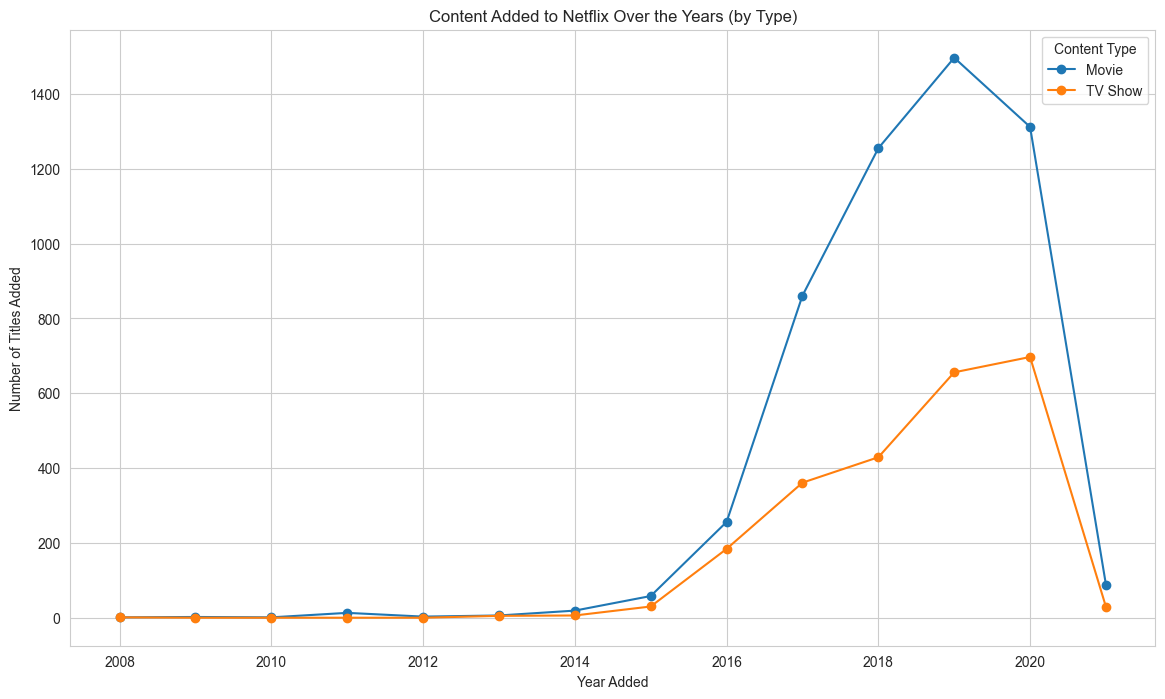

In [17]:
# Group data by year and content type
content_over_time = netflix_df.groupby(['year_added', 'type']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
content_over_time.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Content Added to Netflix Over the Years (by Type)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

**Insight:** By separating movies and TV shows, we can see that while both grew significantly, the addition of movies accelerated much more dramatically, peaking in 2019. The growth in TV shows has been more steady. There appears to be a slight slowdown in content additions in 2020 and 2021, which could be due to the COVID-19 pandemic affecting productions or the dataset being incomplete for the latest year.

<Figure size 1400x800 with 0 Axes>

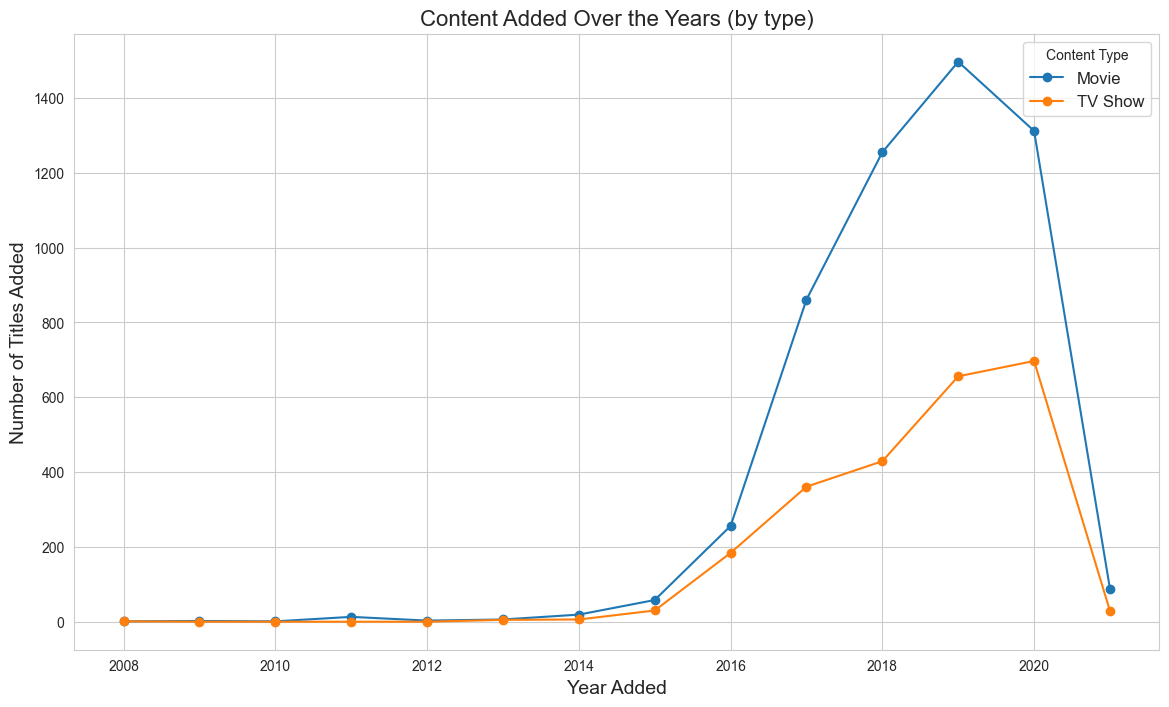

In [18]:
content_added_over_time = netflix_df.groupby(['year_added', 'type']).size().unstack().fillna(0)

plt.figure(figsize = (14,8))
content_added_over_time.plot(kind='line', marker = 'o', figsize = (14,8))
plt.title('Content Added Over the Years (by type)', fontsize = 16)
plt.xlabel('Year Added', fontsize = 14)
plt.ylabel('Number of Titles Added', fontsize = 14)
plt.legend(title = 'Content Type', fontsize = 12)
plt.grid(True)
plt.show()


In [19]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12


### Q. What are the most popular genres?

#### Handling Multi-Value Text Columns
The `listed_in` column contains strings with multiple genres separated by commas (e.g., "Dramas, International Movies"). To analyze each genre individually, we need to transform the data. A common technique is to:
1.  **Split** the string in each row into a list of genres.
2.  **Explode** the DataFrame so that each genre in the list gets its own row, duplicating the other information for that title.
This allows us to perform a `value_counts()` on the genres.

In [20]:
# Split the 'listed_in' column and explode it
genres = netflix_df.assign(genre=netflix_df['listed_in'].str.split(', ')).explode('genre')

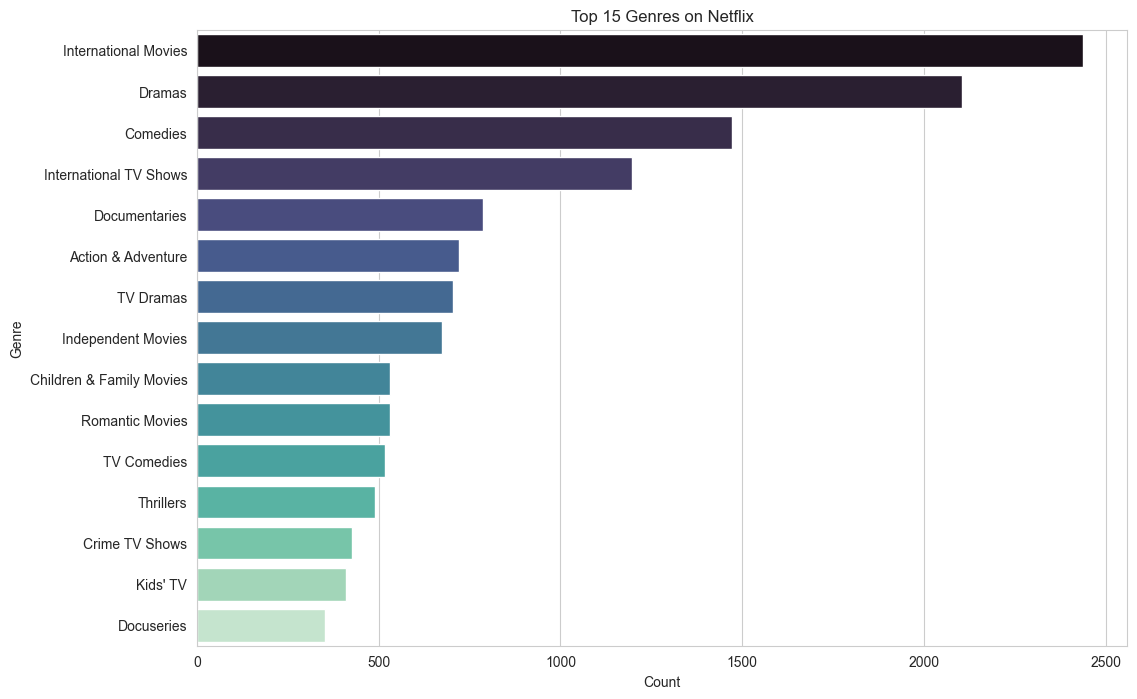

In [21]:
# Get the top 15 genres and their counts
top_genres_counts = genres['genre'].value_counts().reset_index()
top_genres_counts.columns = ['genre', 'count'] # Rename columns for clarity

# Select only the top 15 for plotting
top_genres_counts_plot = top_genres_counts.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y='genre', x='count', data=top_genres_counts_plot, palette='mako', hue='genre', legend=False)
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

**Insight:** "International Movies" is the most common genre tag, highlighting Netflix's global content strategy. This is followed by Dramas, Comedies, and Action & Adventure.

### Q. What is the distribution ofcontent duration?

In [22]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added'],
      dtype='object')

In [23]:
# netflix_df[netflix_df['type'] == 'Movie']

In [24]:
# Separate movies and TV shows
movies_df = netflix_df[netflix_df['type'] == 'Movie'].copy()
tv_shows_df = netflix_df[netflix_df['type'] == 'TV Show'].copy()

In [25]:
# Clean and convert duration for movies
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '').astype(int)

# Clean and convert duration for TV shows
tv_shows_df['seasons'] = tv_shows_df['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

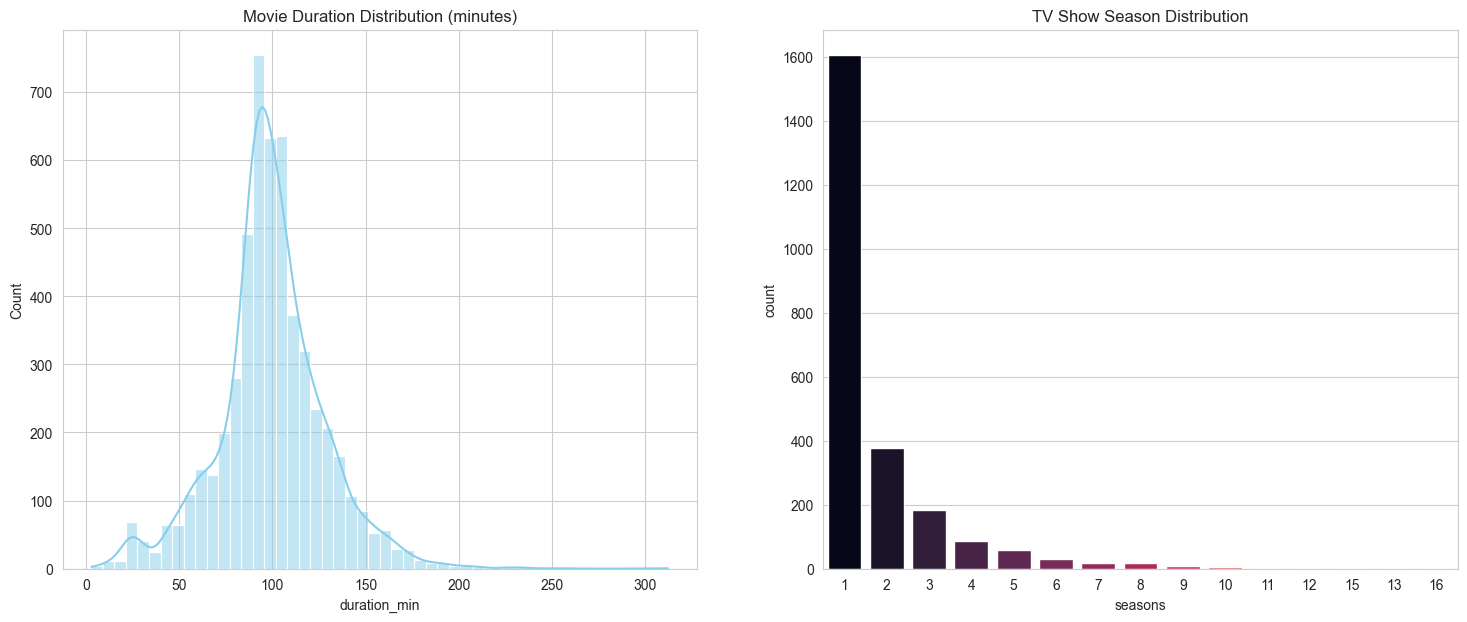

In [26]:
# Plot the distributions
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Movie Duration Distribution
sns.histplot(
    ax=axes[0], data=movies_df, x="duration_min", bins=50, kde=True, color="skyblue"
).set_title("Movie Duration Distribution (minutes)")

# TV Show Season Distribution
sns.countplot(
    ax=axes[1],
    x="seasons",
    data=tv_shows_df,
    palette="rocket",
    order=tv_shows_df["seasons"].value_counts().index,
    hue="seasons",
    legend=False,
).set_title("TV Show Season Distribution")

plt.show()

**Insight:**
- The majority of movies on Netflix are between 80 and 120 minutes long, which is standard for feature films.
- The vast majority of TV shows on Netflix are short-lived, with most having only 1 season. This could reflect a strategy of producing many pilots and only renewing the most successful ones, or a focus on limited series.

### Q. Where does the content come from? (Geographyical Analysis)

In [27]:
# Handle the multi-country listings similar to genres
countries = netflix_df.assign(country=netflix_df['country'].str.split(', ')).explode('country')

In [28]:
# Get the top 15 countries and their counts
top_countries_counts = countries['country'].value_counts().reset_index()
top_countries_counts.columns = ['country', 'count'] # Rename columns for clarity

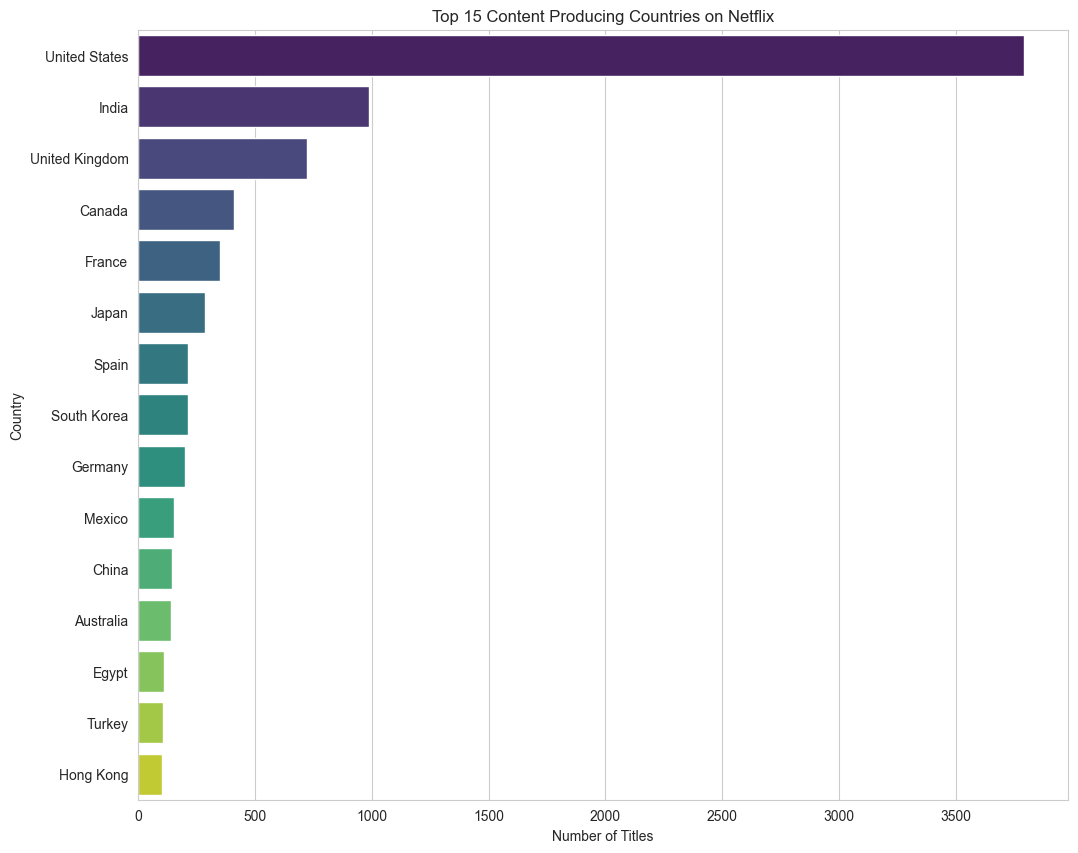

In [29]:
# Select only the top 15 for plotting
top_countries_counts_plot = top_countries_counts.head(15)

plt.figure(figsize=(12, 10))
sns.barplot(y='country', x='count', data=top_countries_counts_plot, palette='viridis', hue='country', legend=False)
plt.title('Top 15 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

**Insight:** The United States is by far the largest producer of content available on Netflix. However, India is a very strong second, which explains why so many of the top actors were from India. The UK, Japan, and South Korea also represent major content markets for the platform, emphasizing its global nature.

In [30]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12


#### Q. What are the maturity ratings of the content?

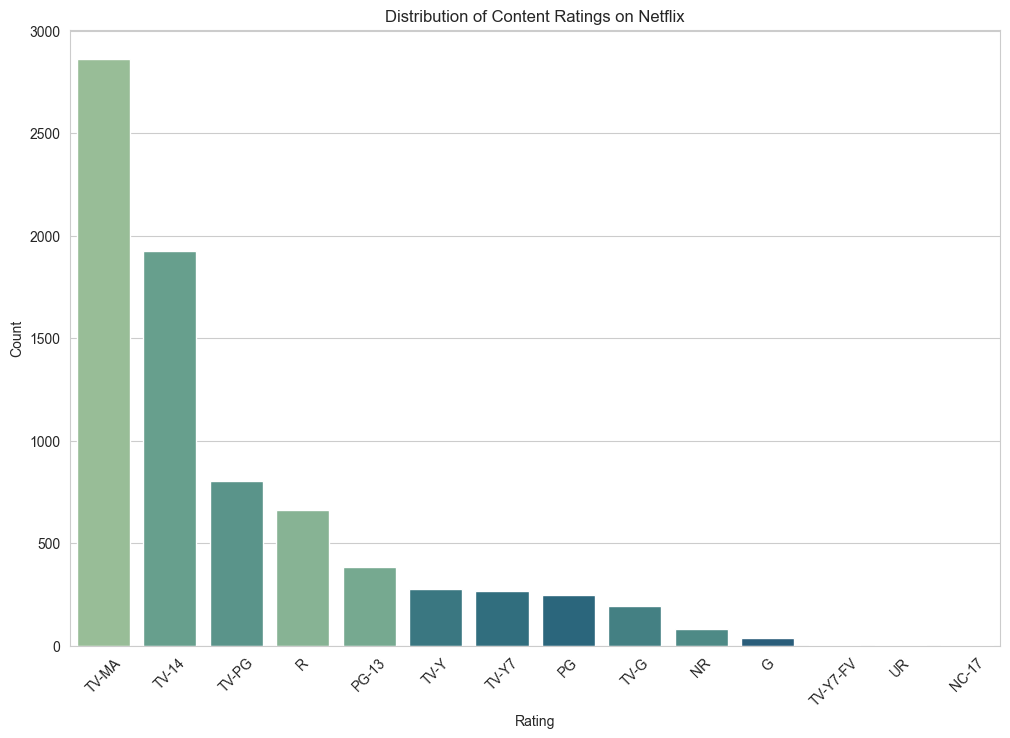

In [31]:
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=netflix_df, order=netflix_df['rating'].value_counts().index, palette='crest', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Insight:** A large portion of Netflix's content is aimed at mature audiences, with `TV-MA` (Mature Audience) and `TV-14` (Parents Strongly Cautioned) being the two most common ratings. This suggests a focus on adult viewers over content for children (`TV-G`, `TV-Y`).

## Feature Engineering

### Deeper Multivariate Analysis

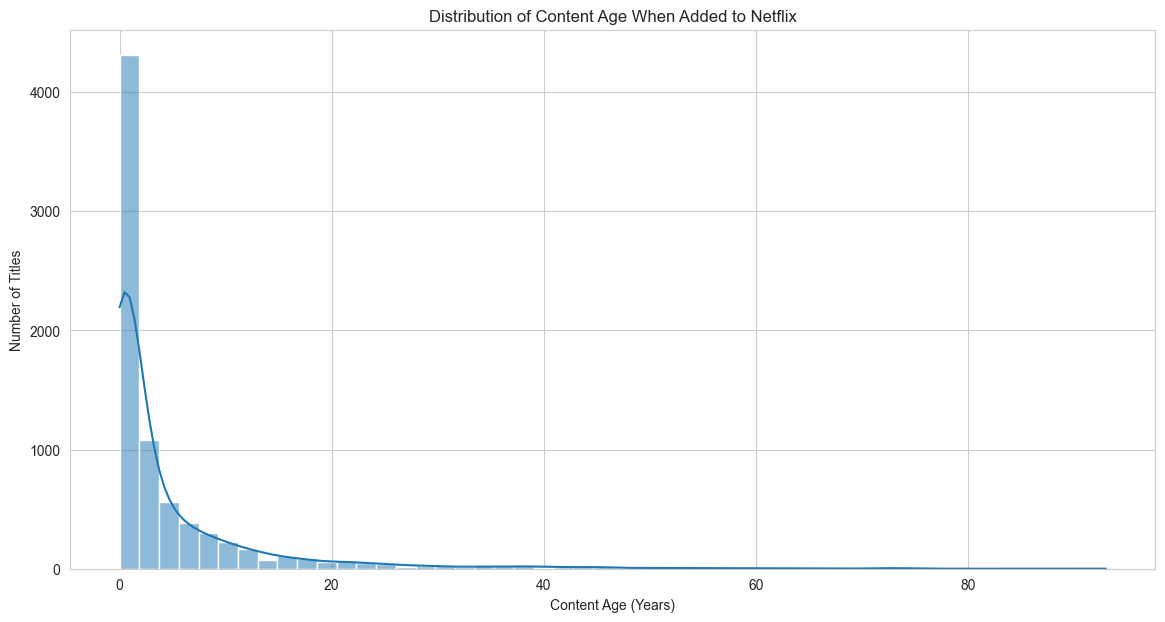

In [32]:
# Create the 'age_on_netflix' feature
netflix_df['age_on_netflix'] = netflix_df['year_added'] - netflix_df['release_year']

# Filter out any potential errors where added_year is before release_year
content_age = netflix_df[netflix_df['age_on_netflix'] >= 0]

plt.figure(figsize=(14, 7))
sns.histplot(data=content_age, x='age_on_netflix', bins=50, kde=True)
plt.title('Distribution of Content Age When Added to Netflix')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.show()

**Insight:** The large spike at `0` indicates that a significant amount of content is added in the same year it's released, which is characteristic of "Netflix Originals." However, there is a very long tail, showing that Netflix also heavily invests in acquiring licensed content that can be decades old, building a deep library of classic films and shows.

## Deeper Multivariate Analysis

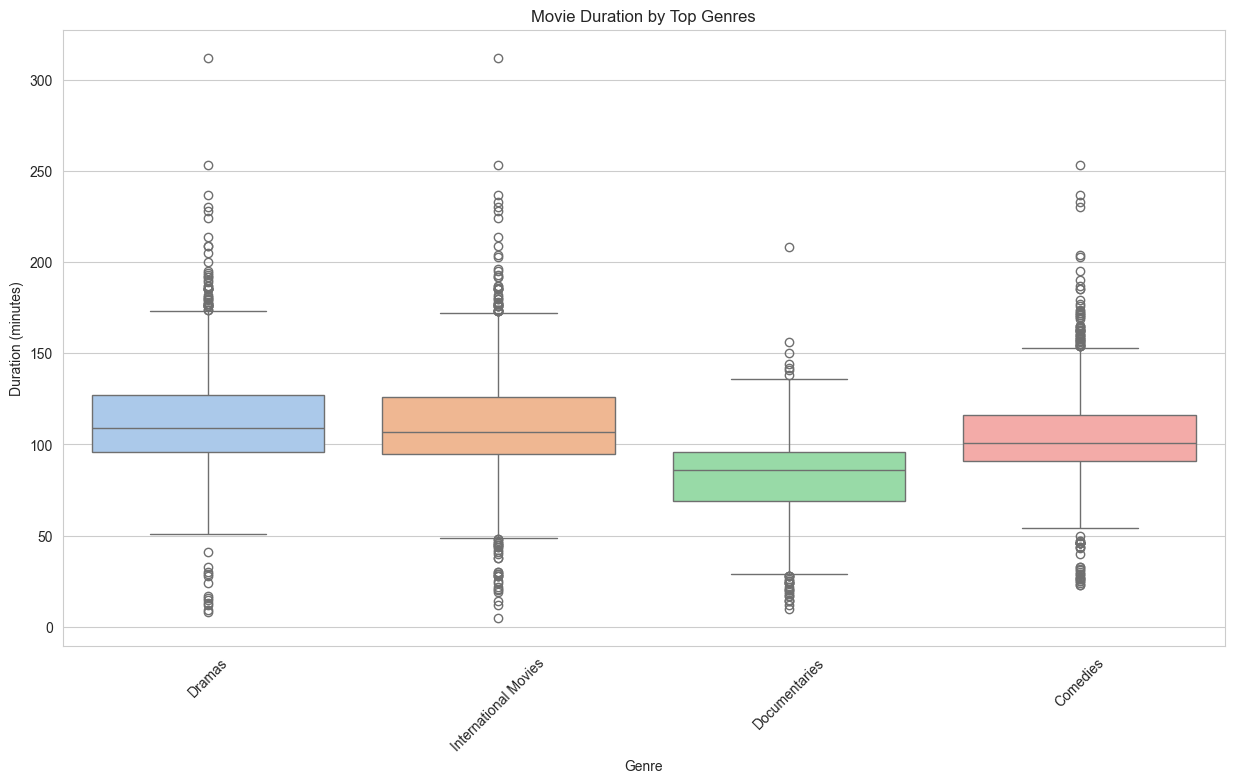

In [33]:
# Analyze movie duration across different top genres
top_genres = genres['genre'].value_counts().index[:5]
genres_movies = genres[(genres['type'] == 'Movie') & (genres['genre'].isin(top_genres))].copy()
genres_movies['duration_min'] = genres_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(15, 8))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='pastel', hue='genre', legend=False)
plt.title('Movie Duration by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

**Insight:** While the median duration for most top genres is similar (around 90-100 minutes), we can see some interesting variations. For example, Dramas tend to have a wider range of durations, with many longer films. International Movies also show a broad distribution, reflecting diverse filmmaking styles from around the world.

### Word Cloud from Content Descriptions

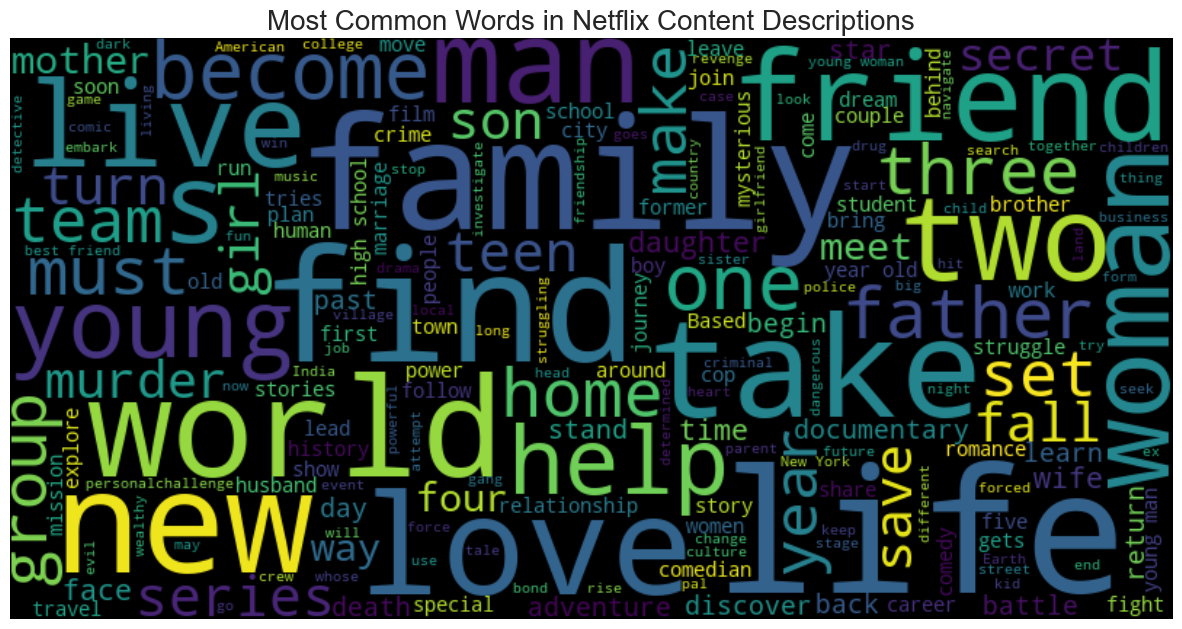

In [34]:
# Combine all descriptions into a single string
text = ' '.join(netflix_df['description'])

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

**Insight:** The word cloud highlights common themes and subjects. Words like "life," "family," "love," "young," "friends," and "world" are prominent, suggesting that much of the content revolves around human relationships and personal journeys. Action-oriented words like "find," "secret," and "new" also appear frequently.

### Q. How has the distribution of content ratings changed over time?

<Figure size 1600x800 with 0 Axes>

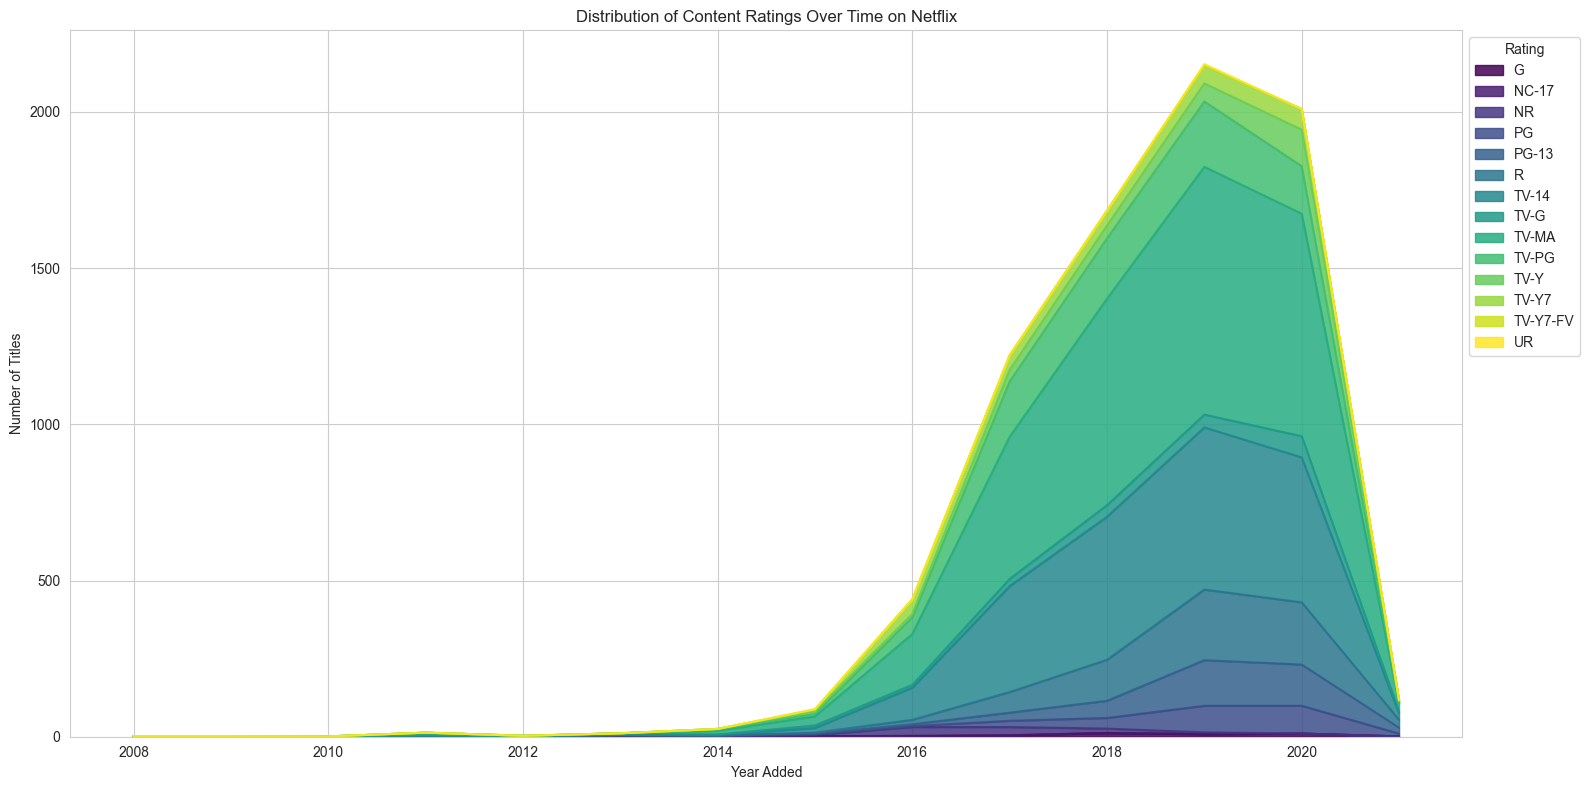

In [35]:
import plotly.express as px

# Group by year_added and rating, then count titles
ratings_over_time = (
    netflix_df.groupby(["year_added", "rating"]).size().unstack(fill_value=0)
)

# Plot: Stacked area chart to show rating distribution over time
ratings_over_time.plot(
    kind="line",
    # stacked=True,
    backend="plotly",
    color_discrete_sequence=px.colors.sequential.Viridis,
    labels={
        "year_added": "Year Added",
        "value": "Number of Titles",
        "rating": "Rating"
    },
    title="Distribution of Content Ratings Over Time on Netflix"
).show()
plt.figure(figsize=(16, 8))
ratings_over_time.plot(kind='area', stacked=True, colormap='viridis', alpha=0.85, figsize=(16, 8))
plt.title('Distribution of Content Ratings Over Time on Netflix')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.legend(title='Rating', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

**Insights:**

- Highest growth is seen for `TV-V7`, `TV-7`, `TV-MA`, `TV-14` with peaks in the year `2019`
- Growth rate for `TV-G` & `TV-PG` are modest yet steady
- Titles rated `PG`, `PG-13`, `NC-17` didn't see high growth
- Nearly all converge to a lower count in year `2021`

### Q. Is there a relationship between content age and its type (Movie vs. TV Show)?

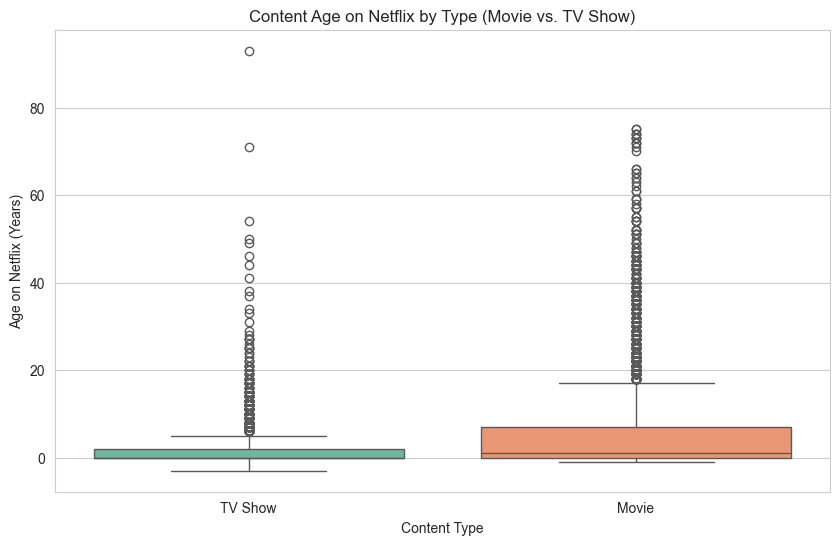

In [36]:
# Analyze the relationship between content age and type (Movie vs. TV Show)
plt.figure(figsize=(10, 6))
sns.boxplot(data=netflix_df, x='type', y='age_on_netflix', palette='Set2', hue='type')
plt.title('Content Age on Netflix by Type (Movie vs. TV Show)')
plt.xlabel('Content Type')
plt.ylabel('Age on Netflix (Years)')
plt.show()

**Insights**:

- ***TV Shows*** on average have lower Content Age
- ***Movies*** have higher Content Age

### Q. Can we identify any trends in content production based on the release year vs. the year added to Netflix?

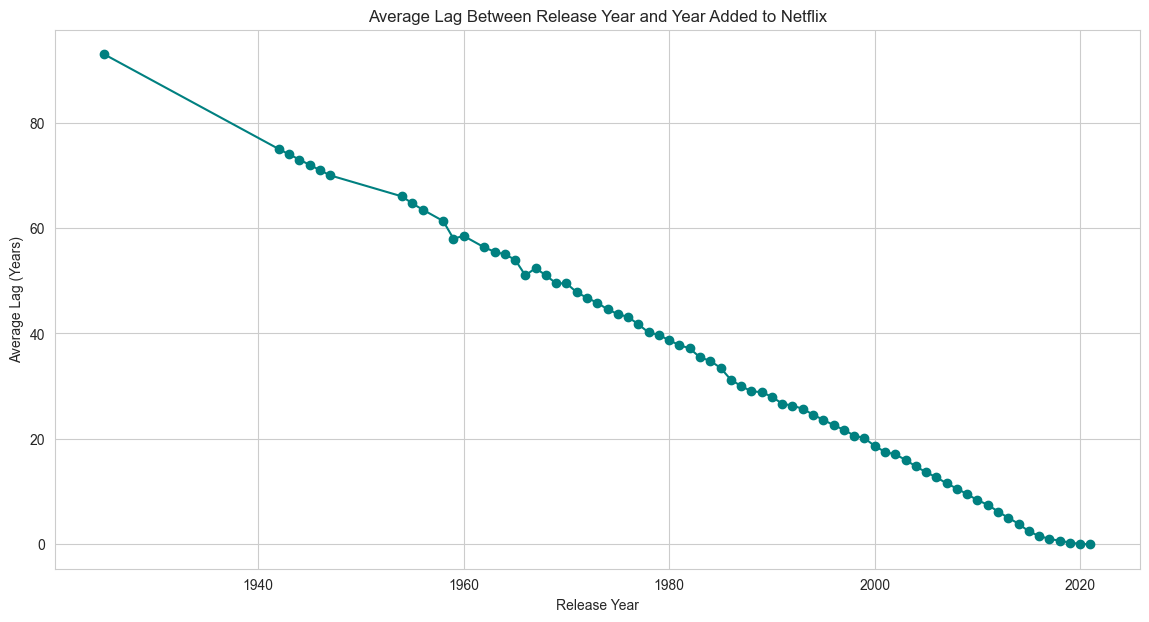

In [37]:
# Calculate the lag between release year and year added
netflix_df['add_lag'] = netflix_df['year_added'] - netflix_df['release_year']

# Group by release year and calculate average lag
avg_lag_by_release = netflix_df.groupby('release_year')['add_lag'].mean()

# Plot the average lag over release years
plt.figure(figsize=(14, 7))
avg_lag_by_release.plot(kind='line', marker='o', color='teal')
plt.title('Average Lag Between Release Year and Year Added to Netflix')
plt.xlabel('Release Year')
plt.ylabel('Average Lag (Years)')
plt.grid(True)
plt.show()

**Insights**:

- The difference in released in theatre to release in Netflix has linearly declined over the years

### Q. What are the most common word pairs or phrases in content descriptions?

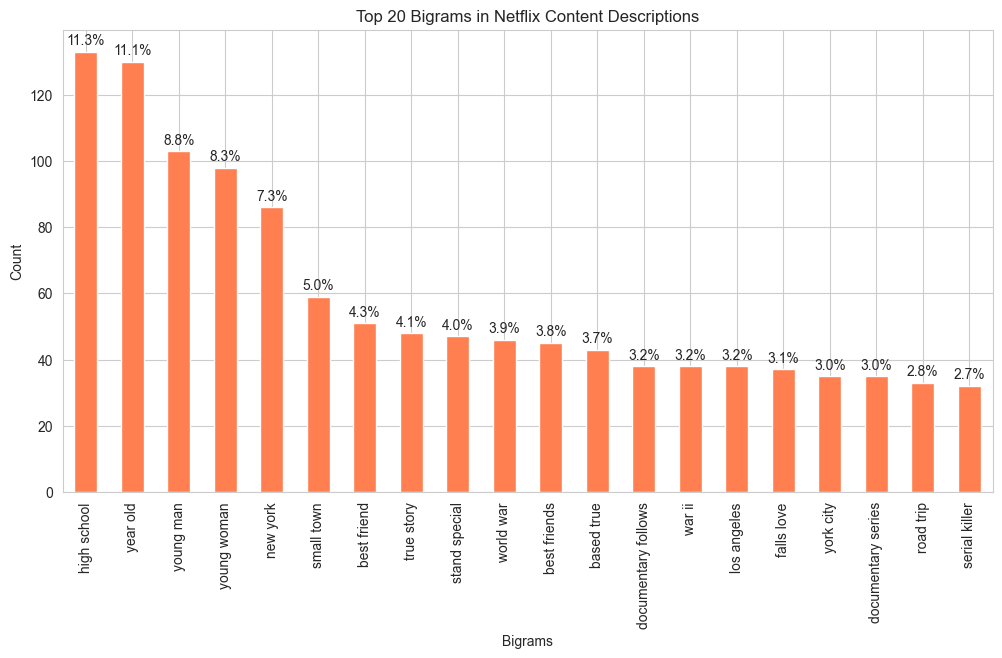

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Get all descriptions
descriptions = netflix_df["description"].dropna().tolist()

# Use CountVectorizer to extract bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words="english")
X = vectorizer.fit_transform(descriptions)
bigrams = vectorizer.get_feature_names_out()
counts = X.sum(axis=0).A1

# Create a DataFrame of bigrams and their counts
bigram_freq = pd.DataFrame({"bigram": bigrams, "count": counts})
top_bigrams = bigram_freq.sort_values(by="count", ascending=False).head(20)

# Display the top 20 bigrams
bars = top_bigrams.reset_index(drop=True).plot(
    kind="bar", x="bigram", y="count", legend=False, figsize=(12, 6), color="coral"
)
total = top_bigrams["count"].sum()
for bar in bars.patches:
    bars.annotate(
        format(bar.get_height() / total, ",.1%"),
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center",
        va="center",
        size=10,
        xytext=(0, 8),
        textcoords="offset points",
    )
plt.title("Top 20 Bigrams in Netflix Content Descriptions")
plt.xlabel("Bigrams")
plt.ylabel("Count")
plt.show()

**Insights**:

- `high school` & `year old` are extremely high
- followed by `young man`, `young woman` as well as `new york`

### Q. Who are the top directors on Netflix?

director
Unknown                   2376
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Jay Chapman                 12
Steven Spielberg            10
David Dhawan                 9
Robert Rodriguez             8
Quentin Tarantino            8
Johnnie To                   8
Hakan Algül                  8
Ryan Polito                  8
Lance Bangs                  8
Shannon Hartman              8
Kunle Afolayan               8
Don Michael Paul             7
Yılmaz Erdoğan               7
Name: count, dtype: int64


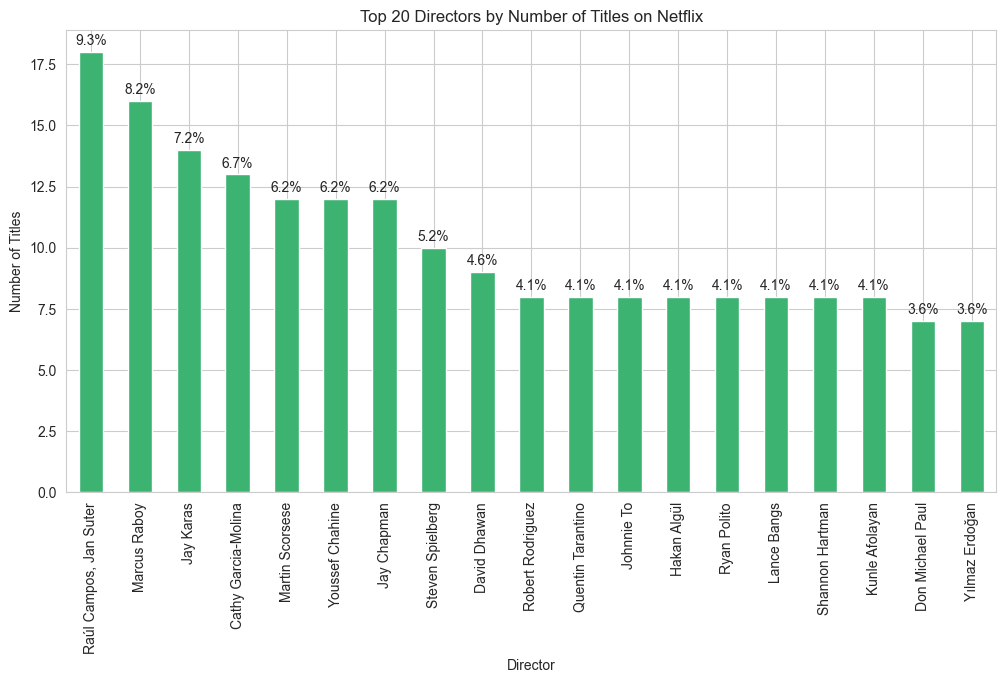

In [39]:
# Get the top 20 directors by number of titles
top_directors = netflix_df['director'].value_counts().head(20)

print(top_directors)

# Display the results
bars = top_directors.iloc[1:].plot(kind='bar', figsize=(12, 6), color='mediumseagreen')
total = sum([bar.get_height() for bar in bars.patches])
for bar in bars.patches:
    bars.annotate(
        format(bar.get_height() / total, ',.1%'),
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center',
        va='center',
        size=10,
        xytext=(0, 8),
        textcoords='offset points'
    )
plt.title('Top 20 Directors by Number of Titles on Netflix')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.show()

**Insights**:

- Top Leading director is `Raúl Campos, Jan Suter`
- Followed closely by `Marcus Raboy` & `Jay Karas`

### Final Conclusion and Summary of Insights

This in-depth EDA of the Netflix dataset has revealed several key characteristics and strategies of the platform's content library.

**Key Findings:**
1. **Content Strategy:** Netflix's library is movie-heavy (~70%), and the platform aggressively added content between 2016-2019. Their strategy involves a mix of brand new originals (added the same year they are released) and a deep library of licensed older content.
2. **Global Dominance:** While the US is the top content producer, the platform is heavily international, with India being a massive contributor. This is reflected in the top genres ("International Movies") and most frequent actors.
3. **Target Audience:** The content library is skewed towards mature audiences, with `TV-MA` and `TV-14` being the most common ratings.
4. **Content Format & Genre:** Dramas and Comedies are universally popular genres. Most movies stick to a standard 90-120 minute runtime, while the vast majority of TV shows only last for a single season, suggesting a high-risk, high-reward approach to series production.
5. **Common Themes:** Descriptions of content frequently revolve around universal themes of life, family, love, and discovery.

**Limitations:** This dataset is a snapshot in time and lacks viewership data. Therefore, our analysis is of the *supply* of content, not its *demand* or popularity. Nonetheless, this EDA provides a strong, multi-faceted understanding of the composition and evolution of the Netflix library.